# Exploratory Data Analysis

### Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

import missingno as msno
import warnings

# Significance tests
from scipy.stats import mannwhitneyu

warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows')
#pd.reset_option(“max_columns”)

# Imports function from GitHub
!curl -Os https://raw.githubusercontent.com/jgeorge313/DS_GA_1001_Capstone/main/Contributors/Helper_Functions.py
%run Helper_Functions.py

In [84]:
ds_dataset = pd.read_csv('https://raw.githubusercontent.com/jgeorge313/DS_GA_1001_Capstone/main/Levels_Fyi_Salary_Data.csv')
F1000_dataset = pd.read_csv('https://raw.githubusercontent.com/jgeorge313/DS_GA_1001_Capstone/main/Fortune_1000.csv')
raw_df = pd.merge(ds_dataset, F1000_dataset, how='left', on='company')
raw_df = match_industry(raw_df)
raw_df.head()

timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3   6/17/2017 0:23:14      Apple    M1  Software Engineering Manager   
4  6/20/2017 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  ...  state  newcomer ceo_founder  \
0             1.5  NaN    107000.0  ...     CA        no          no   
1             3.0  NaN         0.0  ...     CA        no          no   
2             0.0  NaN    155000.0  ...     WA        no         yes   
3             5.0  NaN    157000.0  ...     CA        no          no   
4             3.0  NaN         0.0  ...     WA        no          no   

  ceo_woman  profitable  prev_rank               CEO  \
0       yes         yes       81.0     Safra A. Catz   
1        no         yes      295.0     Jamie Iannone   
2        no         yes        5.0  Jeffrey P. Bezos   
3        no         yes        3.0   Timothy D. Cook   
4        no         yes       26.0     Satya Nadella   

                     Website  Ticker  Market Cap  
0     https://www.oracle.com    ORCL      170158  
1       https://www.ebay.com    EBAY     23930.2  
2     https://www.amazon.com    AMZN     1637405  
3      https://www.apple.com    AAPL     2221176  
4  https://www.microsoft.com    MSFT     1696122  

[5 rows x 46 columns]

### Data Visualization

#### Missing Values

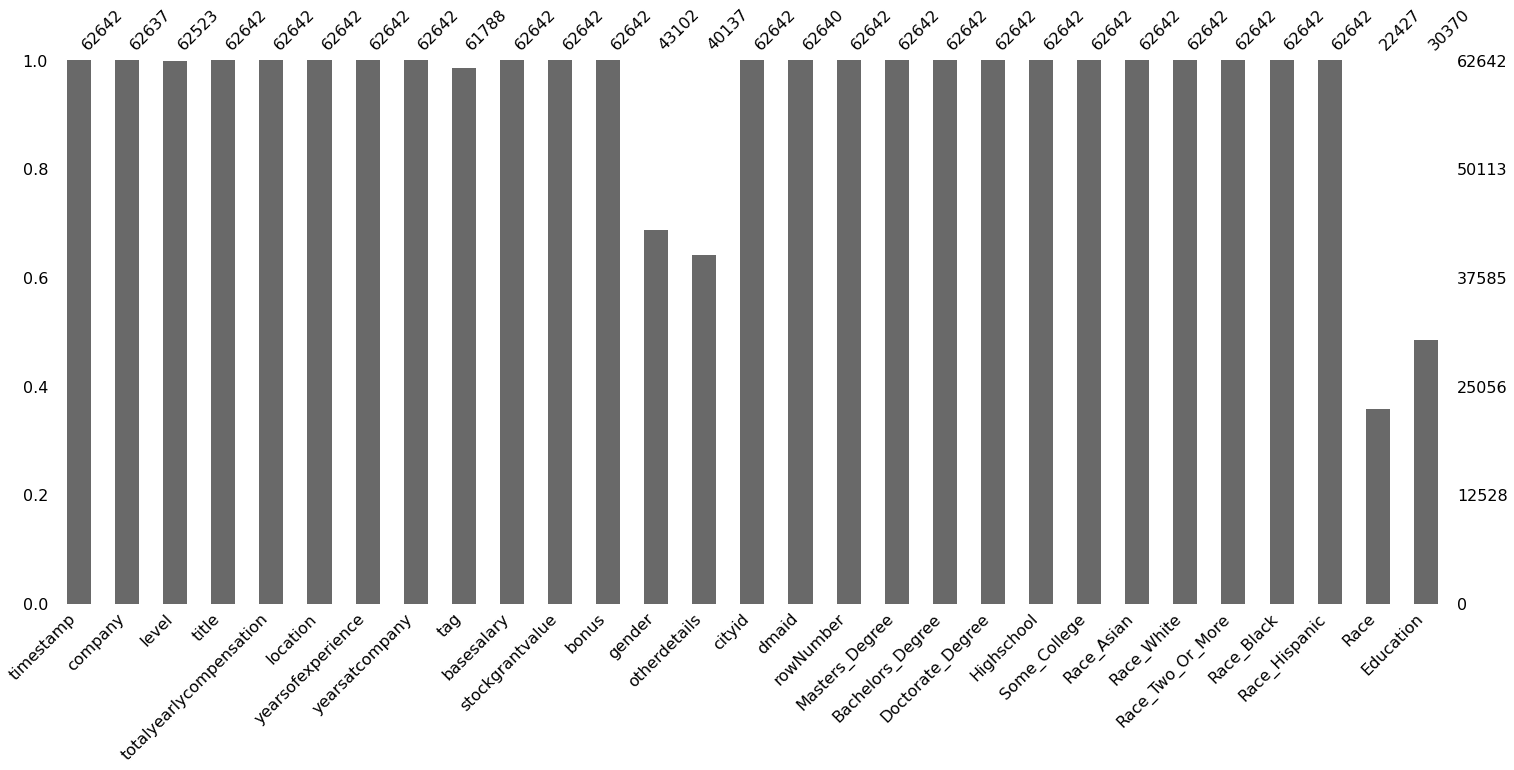

In [41]:
msno.bar(df)
plt.show()

#### General plots

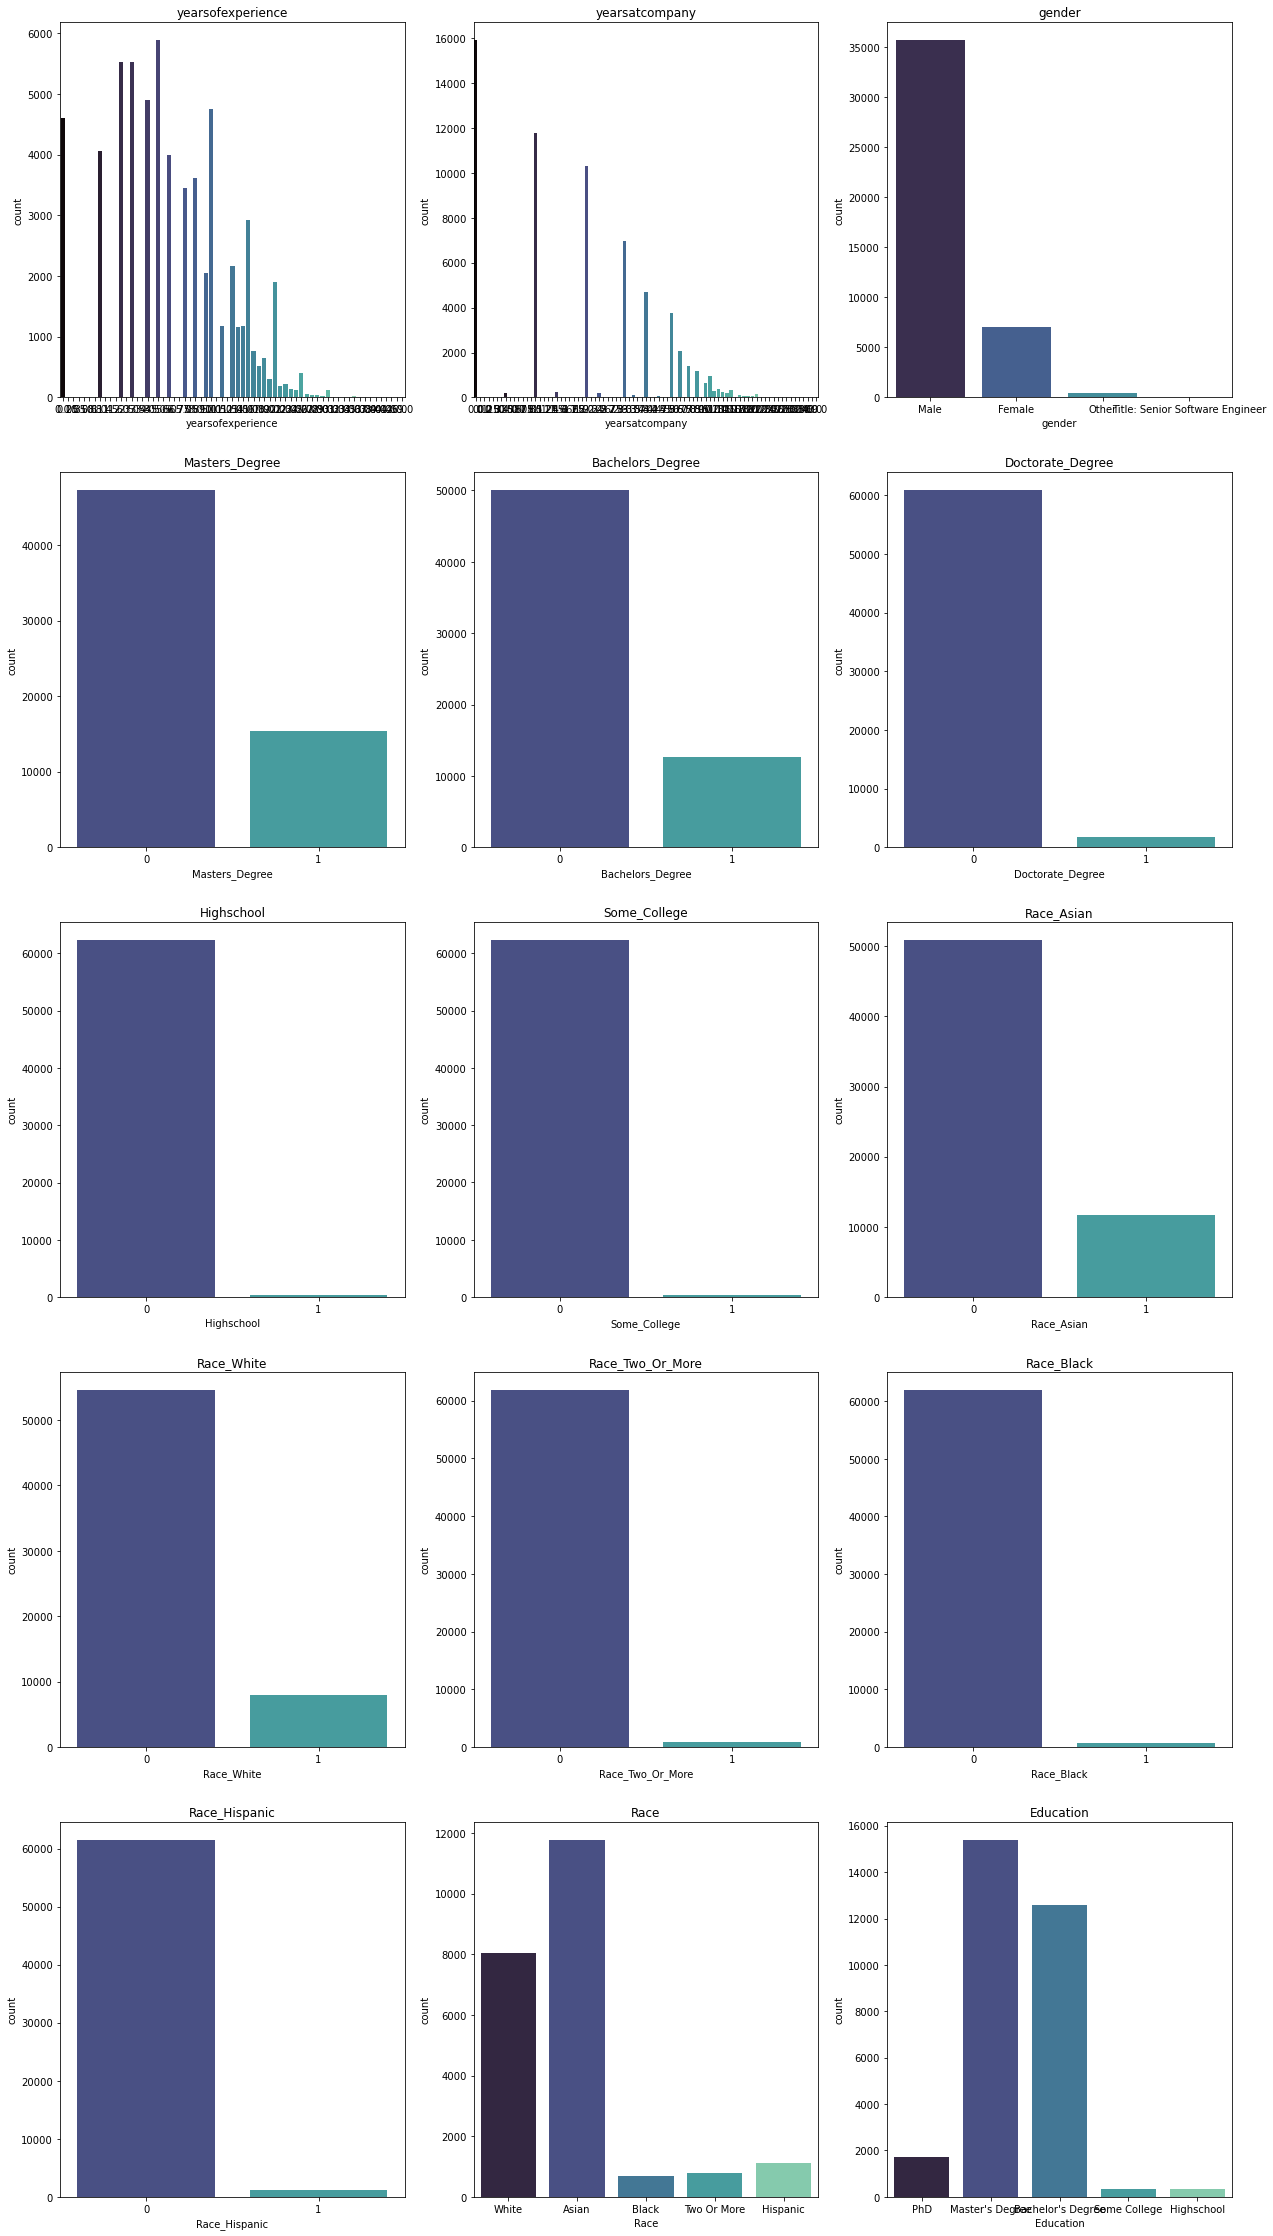

In [58]:
categorical_features = ['yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree', 'Bachelors_Degree', 
                        'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 
                        'Race_Black', 'Race_Hispanic', 'Race', 'Education']

plot_features(df, categorical_features, is_categorical=True)

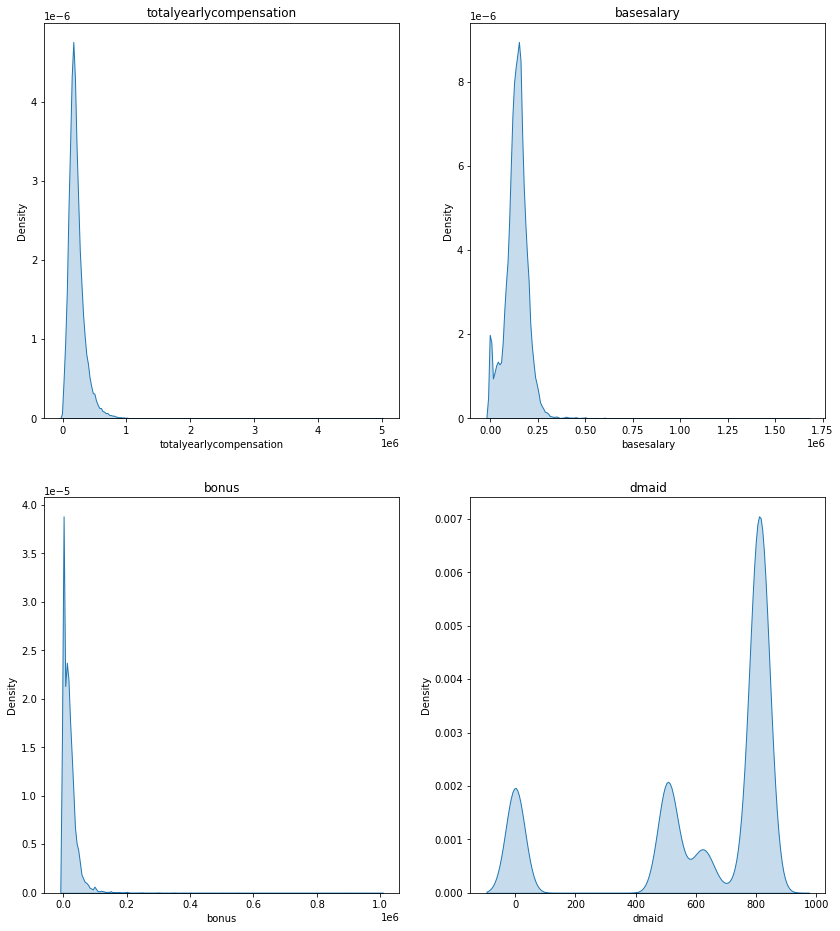

In [56]:
continuous_features = ['totalyearlycompensation', 'basesalary', 'bonus', 'dmaid']

plot_features(df, continuous_features, is_categorical=False)

In [57]:
#Skipped: timestamp, otherdetails, cityid, rowNumber

#### Data Cleaning

In [86]:
df = raw_df[['company', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience', 'yearsatcompany', 
             'tag', 'basesalary', 'stockgrantvalue', 'bonus', 'gender', 'Education', 'Race', 'sector', 'city', 'state']]

In [87]:
# Rounds the number of years of experience (reduces number of categories)
df.loc[:,'yearsofexperience'] = np.round(df.loc[:,'yearsofexperience'])
df.loc[:,'yearsatcompany'] = np.round(df.loc[:,'yearsatcompany'])

#Drop users that had a higher value for yearsatcompany than yearsofexperience
df.drop(df[(df.loc[:,'yearsatcompany'] - df.loc[:,'yearsofexperience']) > 0].index.to_list(), inplace=True)

#### Hypothesis 1 (When controlling for experience, do people with high vs. low experience years at current company make more?)

$H_0$: People that have worked longer in a company earn equal salaries than people that have not worked as long in that same company.

$H_1$: People that have worked longer in a company earn significantly different salaries than people that have not worked as long in that same company.<br>

*Controlling for 10 to 15 years of experience*

In [24]:
test_input1 = hypothesis_data1(df, 'yearsofexperience', 'yearsatcompany', 'totalyearlycompensation', [5, 10, 15])

In [31]:
for key in test_input1.keys():
    test = mannwhitneyu(test_input1[key][0], test_input1[key][1], alternative='two-sided') #Runs a Mann Whitney U-test
    if test.pvalue < 0.05:
        print('{} years of experience: \nWe reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))
    else:
        print('{} years of experience: \nWe fail to reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))

0-5 years of experience: 
We reject the Null Hypothesis (p-value = 1.588639724629893e-06)

5-10 years of experience: 
We reject the Null Hypothesis (p-value = 4.018405254335355e-08)

10-15 years of experience: 
We reject the Null Hypothesis (p-value = 1.6488392594767118e-06)

15-69.0 years of experience: 
We reject the Null Hypothesis (p-value = 4.798170853598533e-13)



In [42]:
for key in test_input1.keys():
    print('{} years of experience: \nlow experience: ${}, high experience: ${}\n'.format(key, int(test_input1[key][0].mean()), int(test_input1[key][1].mean())))

0-5 years of experience: 
low experience: $155618, high experience: $163693

5-10 years of experience: 
low experience: $218884, high experience: $213450

10-15 years of experience: 
low experience: $269486, high experience: $258579

15-69.0 years of experience: 
low experience: $334904, high experience: $312521



During the first 5 years at a company, it appears that people who have not worked at their current company for as long earn less, and that this difference in pay is statistically significant. However, for more experienced respondents, those who have spent less time at their current company make MORE, with this difference in medians also being significant. 

#### Hypothesis 2 (When controlling for experience, do people that work at FAANG earn higher salaries than people that don't?)

$H_0$: People that work at FAANG earn the same salary than other non-FAANG tech workers. <br>
$H_1$: People that work at FAANG earn a significantly different salary than other non-FAANG tech workers.<br>
*Controlling for 10 to 15 years of experience*

In [20]:
test_input2 = hypothesis_data2(df, 'yearsofexperience', 'sector', 'company', 'totalyearlycompensation', [5, 10, 15])

In [34]:
for key in test_input2.keys():
    test = mannwhitneyu(test_input2[key][0], test_input2[key][1], alternative='two-sided') #Runs a Mann Whitney U-test
    if test.pvalue < 0.05:
        print('{} years of experience: \nWe reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))
    else:
        print('{} years of experience: \nWe fail to reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))

0-5 years of experience: 
We reject the Null Hypothesis (p-value = 2.9692204779651074e-288)

5-10 years of experience: 
We reject the Null Hypothesis (p-value = 2.7851737643864135e-249)

10-15 years of experience: 
We reject the Null Hypothesis (p-value = 2.0603956403294878e-147)

15-69.0 years of experience: 
We reject the Null Hypothesis (p-value = 1.1132860793429578e-104)



In [40]:
for key in test_input2.keys():
    print('{} years of experience: \nfaang: ${}, non-faang: ${}\n'.format(key, int(test_input2[key][0].mean()), int(test_input2[key][1].mean())))

0-5 years of experience: 
faang: $225743, non-faang: $155794

5-10 years of experience: 
faang: $310869, non-faang: $200313

10-15 years of experience: 
faang: $387651, non-faang: $243107

15-69.0 years of experience: 
faang: $493835, non-faang: $302743



At all experience levels, FAANG respondents mae more than their non-Faang tech counterparts, with this difference being significant at all levels of experience. 

#### Hypothesis 3 (When controlling for experience, do men and women earn significantly different pay?)

$H_0$: The median earnings of men and women are the same. <br>
$H_1$: The median earnings of men and women differ.<br>
*Controlling for years of experience

In [12]:
test_input3 = gender_control_experience_buckets(df, [5, 10, 15])

In [45]:
for key in test_input3.keys():
    test = mannwhitneyu(test_input3[key][0], test_input3[key][1], alternative='two-sided') #Runs a Mann Whitney U-test
    if test.pvalue < 0.05:
        print('{} years of experience: \nWe reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))
    else:
        print('{} years of experience: \nWe fail to reject the Null Hypothesis (p-value = {})\n'.format(key, test.pvalue))

5 years of experience: 
We fail to reject the Null Hypothesis (p-value = 0.08140143716732828)

10 years of experience: 
We fail to reject the Null Hypothesis (p-value = 0.10355244621227366)

15 years of experience: 
We reject the Null Hypothesis (p-value = 1.4362411049763289e-06)



In [50]:
for key in test_input3.keys():
    print('{} years of experience: \nFemale: ${}, Male: ${}\n'.format(key, int(pd.Series(test_input3[key][0]).mean()), int(pd.Series(test_input3[key][1]).mean())))

5 years of experience: 
Female: $164150, Male: $163498

10 years of experience: 
Female: $180852, Male: $186980

15 years of experience: 
Female: $188779, Male: $200270



Given these results, we fail to reject the null hypothesis for respondents with 0-5 years of experience and 5-10 years of experience. However, total compensation for respondents with greater than 15 years of experience differs between women and men, with this difference being statistically significant.

## PCA

In [97]:
pca_df = df[['company', 'title', 'totalyearlycompensation', 'location',
             'yearsofexperience', 'yearsatcompany', 'gender', 'Education', 'Race', 'sector']]

In [99]:
pca_df.dropna().shape

(18213, 10)

In [108]:
pca = PCA()
output_pca = pca.fit_transform(pca_df);

ValueError: could not convert string to float: 'Oracle'